<a href="https://colab.research.google.com/github/ecenn/C23-PS260/blob/main/Machine%20Learning/diabetes_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

#**Data**

In [ ]:
file = '/content/diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file, ',')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df = df.reindex(columns=["Diabetes_binary","Sex","Age","BMI","HighBP","HighChol","HeartDiseaseorAttack","Smoker","Stroke","Fruits","Veggies","HvyAlcoholConsump","PhysActivity","DiffWalk"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   Sex                   253680 non-null  float64
 2   Age                   253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   HighBP                253680 non-null  float64
 5   HighChol              253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   Smoker                253680 non-null  float64
 8   Stroke                253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  PhysActivity          253680 non-null  float64
 13  DiffWalk              253680 non-null  float64
dtypes: float64(14)
memory usage: 27.1 MB


In [ ]:
X = df.drop(['Diabetes_binary'],axis=1)
Y = df['Diabetes_binary']

<Axes: xlabel='Diabetes_binary', ylabel='count'>

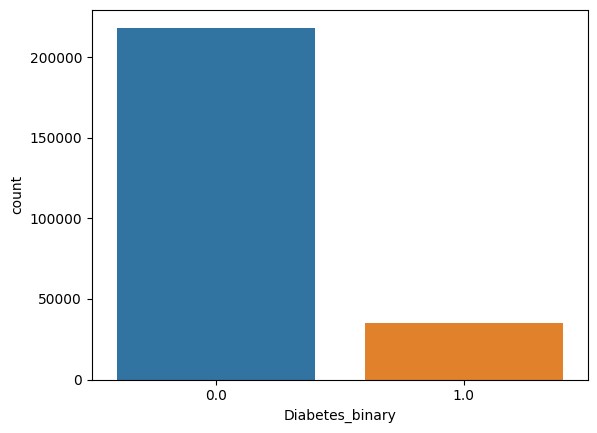

In [ ]:
sns.countplot(data=df, x='Diabetes_binary')

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#**Logistic Regression**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# Model
model = Sequential()
model.add(Dense(512, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(),bias_regularizer=tf.keras.regularizers.L2())),
tf.keras.layers.Dropout(0.2),
model.add(Dense(256, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(),bias_regularizer=tf.keras.regularizers.L2())),
model.add(Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(),bias_regularizer=tf.keras.regularizers.L2())),
tf.keras.layers.Dropout(0.1),
model.add(Dense(64, activation="relu")),
tf.keras.layers.Dropout(0.05),
model.add(Dense(1, activation='sigmoid', input_dim=x_train.shape[1]))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1388/1388 [==============================] - 16s 10ms/step - loss: 2.1151 - accuracy: 0.8591 - val_loss: 0.8773 - val_accuracy: 0.8623
Epoch 2/10
1388/1388 [==============================] - 15s 11ms/step - loss: 0.7035 - accuracy: 0.8615 - val_loss: 0.5991 - val_accuracy: 0.8625
Epoch 3/10
1388/1388 [==============================] - 15s 11ms/step - loss: 0.5441 - accuracy: 0.8620 - val_loss: 0.5126 - val_accuracy: 0.8601
Epoch 4/10
1388/1388 [==============================] - 16s 11ms/step - loss: 0.4756 - accuracy: 0.8619 - val_loss: 0.4515 - val_accuracy: 0.8650
Epoch 5/10
1388/1388 [==============================] - 15s 11ms/step - loss: 0.4364 - accuracy: 0.8620 - val_loss: 0.4191 - val_accuracy: 0.8634
Epoch 6/10
1388/1388 [==============================] - 15s 11ms/step - loss: 0.4121 - accuracy: 0.8622 - val_loss: 0.4106 - val_accuracy: 0.8603
Epoch 7/10
1388/1388 [==============================] - 16s 11ms/step - loss: 0.3960 - accuracy: 0.8621 - val_loss: 0.3842 -

#**Performance Evaluation**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Akurasi model pada data pengujian: {accuracy * 100:.2f}%")

2379/2379 [==============================] - 8s 3ms/step - loss: 0.3643 - accuracy: 0.8638
Akurasi model pada data pengujian: 86.38%
